# matplotlib

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline  # 内嵌画图

UsageError: unrecognized arguments: # 内嵌画图


**颜色定义：**

In [1]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

![](img/WeChat_Image_20190819215347.jpg)

本文用以下思路来讲解：

- 第一章介绍 matplotlib 中的绘图逻辑，图包含的重要元素和他们之间的层级 (hierarchy)

- 第二章只关注折线图 (line chart)，但是一步步从最初的烂图完善到最终的美图。**这样可以把一种类型的图中的性质吃透，类比到其他类型的图一点也不难。**

- 第三章从画图的四大目的出发，即**分布**、**联系**、**比较**和**构成**，介绍了相对应的直方图 (historgram chart)，散点图 (scatter chart)，折线图 (line chart) 和饼状图 (pie chart)。**这章偏向于用合适的图来实现不同的目的，没有在如何完善图的方面上下功夫，但在最后一节提到了如何画出使信息更有效的表达的图。**

#### 目录

第一章 - Matplotlib 101

    1.1 概览
    1.2 图
    1.3 坐标系 & 子图
    1.4 坐标轴
    1.5 刻度
    1.6 基础元素

第二章 - 画美感图

    2.1 画第一幅图
    2.2 图的默认设置
    2.3 设置尺寸和 DPI
    2.4 设置颜色-风格-宽度
    2.5 设置边界
    2.6 设置刻度标签
    2.7 添加图例
    2.8 添加第二幅图
    2.9 两个坐标系 & 两幅子图
    2.10 设置标注
    2.11 设置透明度
    2.12 完善细节

第三章 - 画有效图

    3.1 概览
    3.2 直方图
    3.3 散点图
    3.4 折线图
    3.5 饼状图
    3.6 同理心

总结

## 1 Matplotlib

### 1.1 概览

Matplotlib 是一个巨无霸，咋一看无从下手，只能分解之后各点击破。总体来说，它包含两类元素：

- 基础 (primitives) 类：线 (line), 点 (marker), 文字 (text), 图例 (legend), 网格 (grid), 标题 (title), 图片 (image) 等。

- 容器 (containers) 类：图 (figure), 坐标系 (axes), 坐标轴 (axis) 和刻度 (tick)

基础类元素是我们想画出的标准对象，而容器类元素是基础类元素的寄居出，它们也有层级结构。

        图 → 坐标系 → 坐标轴 → 刻度
        
![](img/WeChat_Image_20190819220028.jpg)

由上图看出：

- 图包含着坐标系 (多个)
- 坐标系由坐标轴组成 (横轴 xAxis 和纵轴 yAxis)
- 坐标轴上面有刻度 (主刻度 MajorTicks 和副刻度 MinorTicks)

Python 中万物皆对象，Matplotlib 里这些元素也都是对象。下面代码打印出坐标系、坐标轴和刻度。


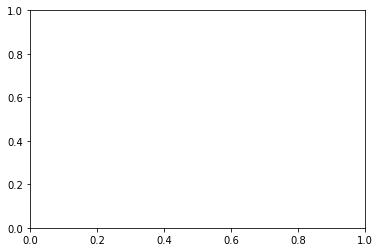

fig.axes: [<matplotlib.axes._subplots.AxesSubplot object at 0x7f115ff20cf8>] 

ax.xaxis: XAxis(54.000000,36.000000)
ax.yaxis: YAxis(54.000000,36.000000) 

ax.xaxis.majorTicks: [<matplotlib.axis.XTick object at 0x7f115ff33860>, <matplotlib.axis.XTick object at 0x7f115ff33160>, <matplotlib.axis.XTick object at 0x7f115dc754e0>, <matplotlib.axis.XTick object at 0x7f115dc755c0>, <matplotlib.axis.XTick object at 0x7f115dc75e10>, <matplotlib.axis.XTick object at 0x7f115dc83320>] 

ax.yaxis.majorTicks: [<matplotlib.axis.YTick object at 0x7f115dc635c0>, <matplotlib.axis.YTick object at 0x7f115ff33eb8>, <matplotlib.axis.YTick object at 0x7f115dc837f0>, <matplotlib.axis.YTick object at 0x7f115dc83e80>, <matplotlib.axis.YTick object at 0x7f115dc83668>, <matplotlib.axis.YTick object at 0x7f115dc757f0>] 

ax.xaxis.minorTicks: [<matplotlib.axis.XTick object at 0x7f115dc6a0f0>]
ax.yaxis.minorTicks: [<matplotlib.axis.YTick object at 0x7f115dc70278>]


In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.show()

xax = ax.xaxis
yax = ax.yaxis

print( 'fig.axes:', fig.axes, '\n')
print( 'ax.xaxis:', xax )
print( 'ax.yaxis:', yax, '\n' )
print( 'ax.xaxis.majorTicks:', xax.majorTicks, '\n' )
print( 'ax.yaxis.majorTicks:', yax.majorTicks, '\n')
print( 'ax.xaxis.minorTicks:', xax.minorTicks )
print( 'ax.yaxis.minorTicks:', yax.minorTicks )

从打印结果可看出坐标系、坐标轴和刻度都是对象。细看一下发现 xaxis 和 yaxis 上面都有 6 个主刻度 (majorTicks)。

此外，由坐标系和坐标轴指向同一个图 (侧面验证了图、坐标系和坐标轴的层级性)。

In [5]:
print( 'axes.figure:', ax.figure )
print( 'xaxis.figure:', xax.figure )
print( 'yaxis.figure:', yax.figure )

axes.figure: Figure(432x288)
xaxis.figure: Figure(432x288)
yaxis.figure: Figure(432x288)


创造完以上四个容器元素后，我们可在上面添加各种基础元素，比如：

- 在坐标轴和刻度上添加标签
- 在坐标系中添加线、点、网格、图例和文字
- 在图中添加图例

如下图所示：

![](img/WeChat_Image_20190819220324.jpg)

接下来四节分别介绍四大容器，让我们先从「图」开始。

### 1.2 图

图是整个层级的顶部。

在图中可以添加基本元素「文字」。

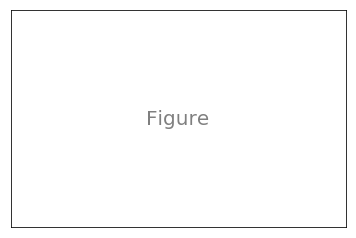

In [16]:
plt.figure()
plt.text( 0.5, 0.5, 'Figure', ha='center', 
          va='center', size=20, alpha=.5 )
plt.xticks([]), plt.yticks([])  # plt默认有刻度
plt.show()

用 plt.text() 函数，其参数解释如下：

- 第一、二个参数是指横轴和纵轴坐标
- 第三个参数字符是指要显示的内容
- ha, va 是横向和纵向位置
- size 设置字体大小
- alpha 设置字体透明度 (0.5 是半透明)


在图中可以添加基本元素「图片」。

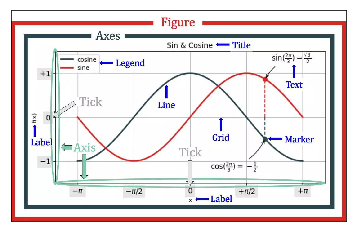

In [21]:
import numpy as np
from PIL import Image
plt.figure()
plt.xticks([]), plt.yticks([])
im = np.array(Image.open('img/WeChat_Image_20190819220324.jpg'))
plt.imshow(im)
plt.show()

用 `Image.open()` 将图片转成像素存在 ndarray 中，再用 plt.imshow() 展示。


在图中可以添加基本元素「折线」。

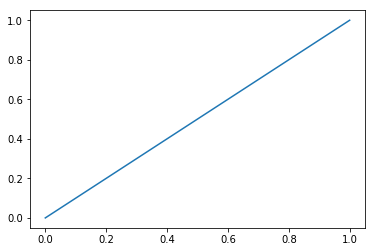

In [18]:
plt.figure()
plt.plot( [0,1],[0,1] )
plt.show()

plt.plot() 函数是用来画折线图的，前两个参数分别是 x 和 y，该函数会在第二节细讲。


当我们每次说画东西，看起来是在图 (Figure) 里面进行的，实际上是在坐标系 (Axes) 里面进行的。一幅图中可以有多个坐标系，因此在坐标系里画东西更方便 (有些设置使用起来也更灵活)。

下面来看看层级中排名第二的「坐标系」。

### 1.3 坐标系 & 子图

一幅图 (Figure) 中可以有多个坐标系 (Axes)，那不是说一幅图中有多幅子图 (Subplot)，因此坐标系和子图是不是同样的概念？

在绝大多数情况下是的，两者有一点细微差别：

- 子图在母图中的网格结构一定是规则的
- 坐标系在母图中的网格结构可以是不规则的

由此可见，子图是坐标系的一个特例，来我们先研究特例。


#### 子图

把图想成矩阵，那么子图就是矩阵中的元素，因此可像定义矩阵那样定义子图 - (行数、列数、第几个子图)。

    subplot(rows, columns, i-th plots)

文字解释起来有些晦涩，看代码和图就好懂了。

#### 1×2 子图

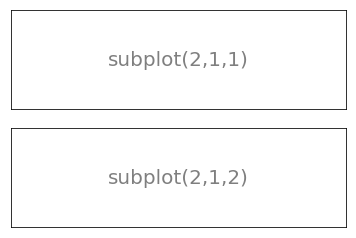

In [24]:
plt.subplot(2,1,1)
plt.xticks([]), plt.yticks([])
plt.text(0.5, 0.5, 'subplot(2,1,1)', ha='center', va='center', size=20, alpha=.5)

plt.subplot(2,1,2)
plt.xticks([]), plt.yticks([])
plt.text(0.5, 0.5, 'subplot(2,1,2)', ha='center', va='center', size=20, alpha=.5)

plt.show()

这两个子图类似于一个列向量

- `subplot(2,1,1)` 是第一幅
- `subplot(2,1,2)` 是第二幅

声明完子图后，下面所有代码就只在这幅子图上生效，直到声明下一幅子图。

#### 2×1 子图

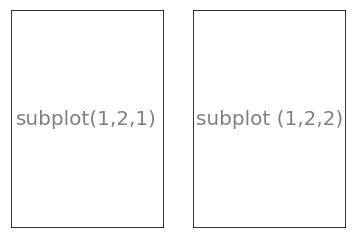

In [25]:
plt.subplot(1,2,1)
plt.xticks([]),plt.yticks([])
plt.text(.5, 0.5, 'subplot(1,2,1)', ha='center', va='center', size=20, alpha=.5)

plt.subplot(1,2,2)
plt.xticks([]), plt.yticks([])
plt.text(.5, 0.5, 'subplot (1,2,2)', ha='center', va='center', size=20, alpha=.5)

plt.show()

这两个子图类似于一个行向量

- `subplot(1,2,1)` 是第一幅
- `subplot(1,2,2)` 是第二幅

#### 2×2 子图

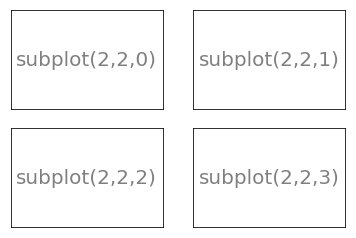

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2)

for i, ax in enumerate(axes.flat):
    ax.set(xticks=[], yticks=[])
    s = 'subplot(2,2,' + str(i) + ')'
    ax.text(0.5, 0.5, s, ha='center', va='center', size=20, alpha=.5)

plt.show()

这次我们用过坐标系来生成子图 (子图是坐标系的特例嘛)，第 1 行

    fig, axes = plt.subplots(nrows=2, ncols=2)

得到的 axes 是一个 2×2 的对象。在第 3 行的 for 循环中用 axes.flat 将其打平，然后在每个 ax 上生成子图。 


#### 坐标系

坐标系比子图更通用，有两种生成方式

- 用 `gridspec` 包加上 `subplot()` 
- 用 `plt.axes()`

#### 不规则网格

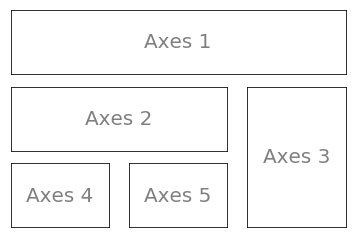

In [34]:
import matplotlib. gridspec as gridspec
G = gridspec.GridSpec(3, 3)

ax1 = plt.subplot(G[0,:])
plt.xticks([]), plt.yticks([])
plt.text(0.5, 0.5, 'Axes 1', ha='center', va='center', size=20, alpha=.5)

ax2 = plt.subplot(G[1,:-1])
plt.xticks([]), plt.yticks([])
plt.text(0.5, 0.5, 'Axes 2', ha='center', va='center', size=20, alpha=.5)

ax3 = plt. subplot(G[1:, -1])
plt.xticks([]), plt. yticks([])
plt.text(0.5, 0.5, 'Axes 3', ha='center', va='center', size=20, alpha=.5)

ax4 = plt.subplot(G[-1, 0])
plt.xticks([]),plt. yticks([])
plt.text(0.5, 0.5, 'Axes 4', ha='center', va='center', size=20, alpha=.5)

ax5 = plt.subplot(G[-1,-2])
plt.xticks([]), plt.yticks([])
plt.text(0.5, 0.5, 'Axes 5', ha='center', va='center', size=20, alpha=.5)

plt.show()

第 2 行将整幅图分成 3×3 份赋值给 G，第 4, 8, 12, 16, 20 行分别用

    plt.subplot(G[])

生成五个坐标系。G[] 里面的切片和 Numpy 数组用法一样：

- G[0, :] = 图的第一行 (Axes 1)
- G[1, :-1] = 图的第二行，第二三列 (Axes 2)
- G[1:, -1] = 图的第二三行，第三列 (Axes 3)
- G[-1, 0] = 图的第三行，第一列 (Axes 4)
- G[-1, -2] = 图的第三行，第二列 (Axes 5)

#### 大图套小图

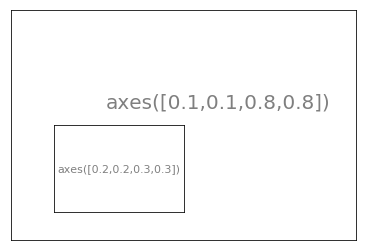

In [40]:
plt.axes([0.1,0.1,0.8,0.8])
plt.xticks([]), plt.yticks([])
plt.text(0.6, 0.6, 'axes([0.1,0.1,0.8,0.8])', ha='center', va='center', size=20, alpha=.5)

plt.axes([0.2,0.2,0.3,0.3])
plt.xticks([]), plt.yticks([])
plt.text(0.5, 0.5, 'axes([0.2,0.2,0.3,0.3])', ha='center', va='center', size=11, alpha=.5)

plt.show()

第 1 和 5 行分别用

    plt.axes([l,b,w,h]) 

其中 [l, b, w, h] 可以定义坐标系

- l 代表坐标系左边到 Figure 左边的水平距离
- b 代表坐标系底边到 Figure 底边的垂直距离
- w 代表坐标系的宽度
- h 代表坐标系的高度

如果 l, b, w, h 都小于 1，那它们是标准化 (normalized) 后的距离。比如 Figure 底边长度为 10， 坐标系底边到它的垂直距离是 2，那么 b = 2/10 = 0.2。

#### 重叠图

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv( '../data/data for matplotlib/S&P500.csv', 
                    index_col=0, 
                    parse_dates=True,
                    dayfirst=True )
data.head(3).append(data.tail(3))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
2019-04-22,2898.780029,2909.510010,2896.350098,2907.969971,2907.969971,2997950000
2019-04-23,2909.989990,2936.310059,2908.530029,2933.679932,2933.679932,3635030000
2019-04-24,2934.000000,2936.830078,2926.050049,2927.250000,2927.250000,3448960000


In [46]:
spx = data[['Adj Close']] \
      .loc['2007-01-01':'2010-01-01']
spx.head(3).append(spx.tail(3))

,Adj Close
Date,
2007-01-03,1416.599976
2007-01-04,1418.339966
2007-01-05,1409.709961
2009-12-29,1126.199951
2009-12-30,1126.420044
2009-12-31,1115.099976


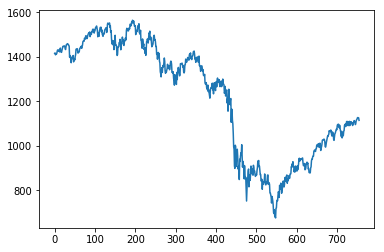

In [47]:
plt.plot( spx.values )
plt.show()

In [48]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

figure size: [6.0, 4.0]
figure dpi: 72.0
line color: C0
line style: -
line width: 1.5
xticks: [-100.    0.  100.  200.  300.  400.  500.  600.  700.  800.]
yticks: [ 600.  800. 1000. 1200. 1400. 1600. 1800.]
xlim: (-37.75, 792.75)
ylim: (632.0990292500001, 1609.58102375)


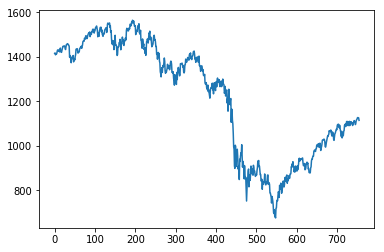

In [49]:
print( 'figure size:', plt.rcParams['figure.figsize'] )
print( 'figure dpi:',plt.rcParams['figure.dpi'] )
print( 'line color:',plt.rcParams['lines.color'] )
print( 'line style:',plt.rcParams['lines.linestyle'] )
print( 'line width:',plt.rcParams['lines.linewidth'] )

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot( spx['Adj Close'].values )

print( 'xticks:', ax.get_xticks() )
print( 'yticks:', ax.get_yticks() )
print( 'xlim:', ax.get_xlim() )
print( 'ylim:', ax.get_ylim() )

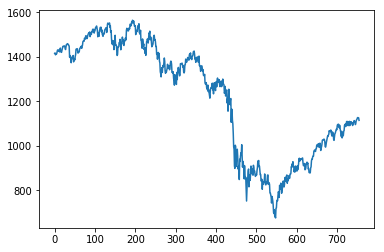

In [51]:
# Create new figure of size6x4 points, using72 dots per inch
plt.figure( figsize=(6, 4), dpi=72)

# Plot using blue color (ce) with a continuous line of width 1.5 (pixels)
plt.plot( spx.values, color='C0', linewidth=1.5, linestyle='-')

# Set x ticks
plt.xticks(np.linspace(-100,800,10))

# Set y ticks
plt.yticks(np.linspace(600,1800,7))

# Set x limits
plt.xlim(-37.75,792.75)

# Set y limits
plt.ylim(632.0990292500001,1609.58102375)

# Show result on screen
plt.show()

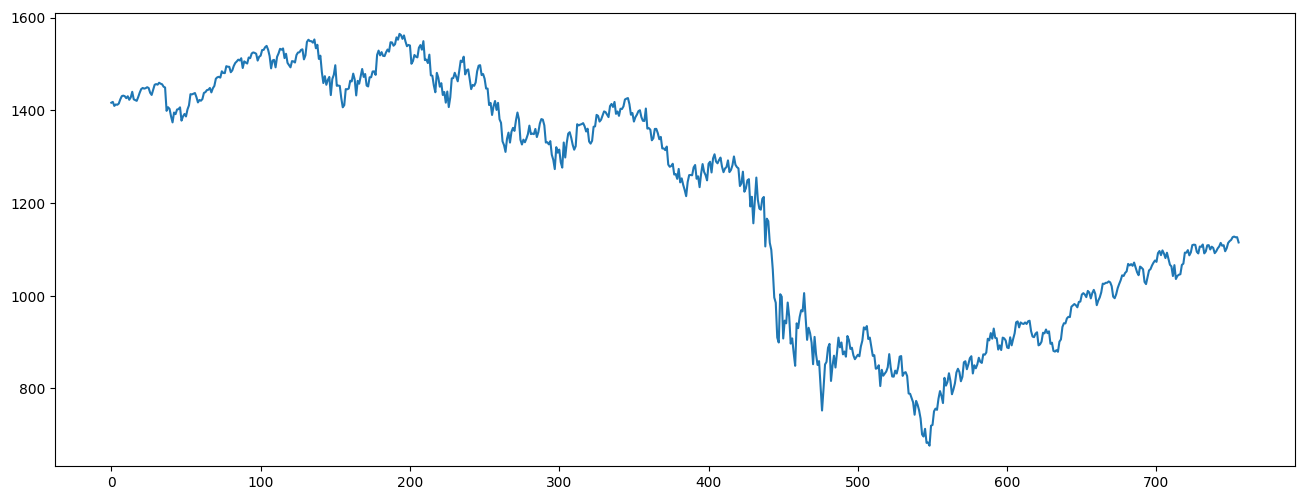

In [52]:
plt.figure( figsize=(16,6), dpi=100 )
plt.plot( spx.values )
plt.show()

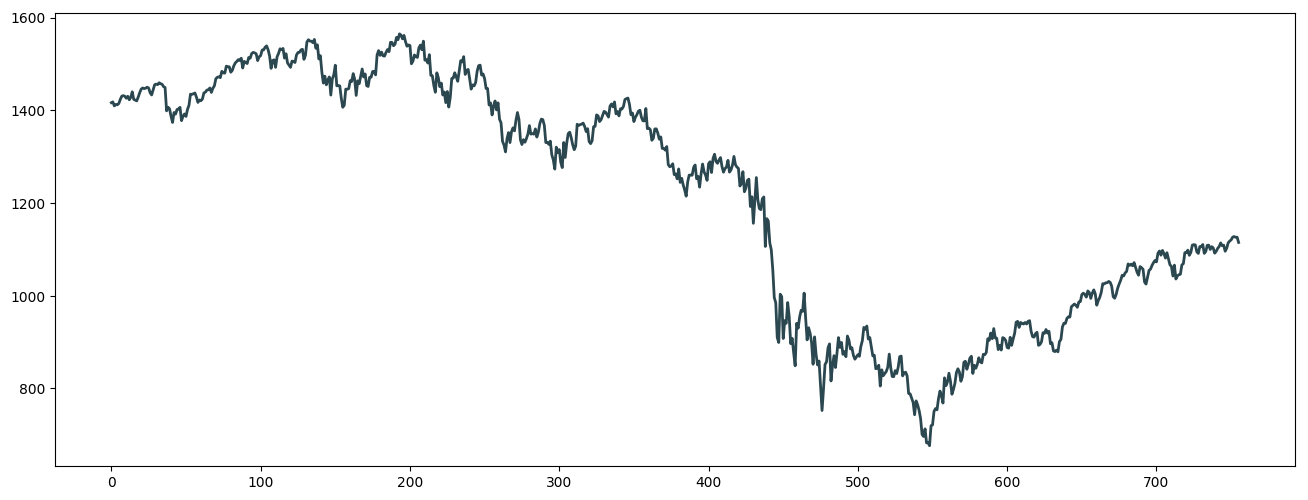

In [53]:
plt.figure( figsize=(16,6), dpi=100 )
plt.plot( spx.values, color=dt_hex, 
          linewidth=2, linestyle='-' )
plt.show()

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(541.2240232, 1878.1800288)

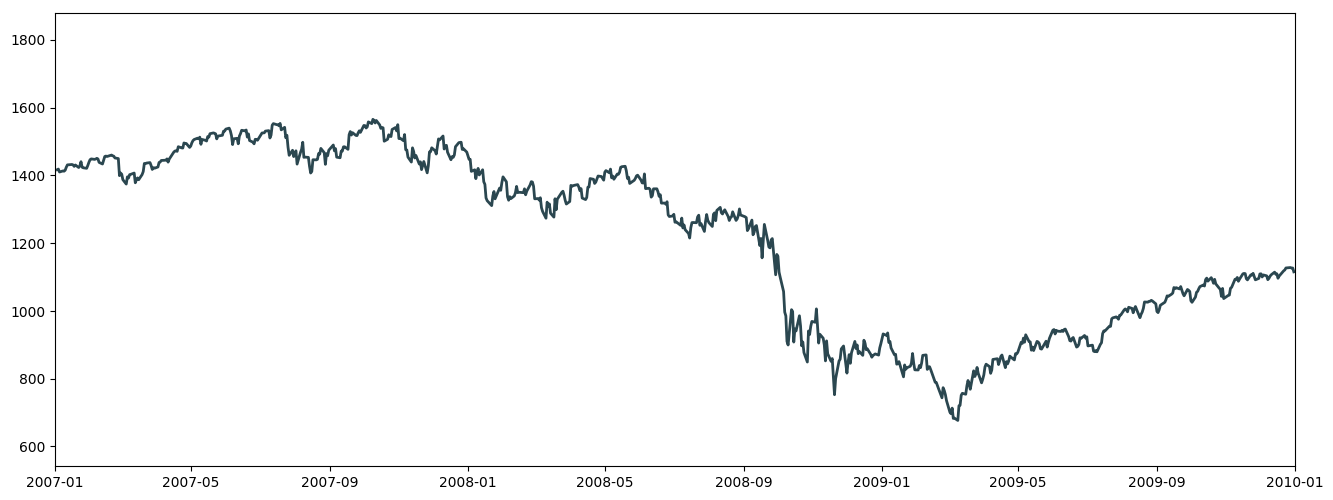

In [54]:
fig = plt.figure(figsize=(16,6), dpi=100)
ax = fig.add_subplot(1,1,1)
x = spx.index
y = spx.values
ax.plot(x, y, color=dt_hex, linewidth=2, linestyle='-')
ax.set_xlim(['1/1/2007', '1/1/2010'])
ax.set_ylim(y.min()*0.8, y.max()*1.2)

[Text(0, 0, '2007-01-03'),
 Text(0, 0, '2007-03-02'),
 Text(0, 0, '2007-04-30'),
 Text(0, 0, '2007-06-26'),
 Text(0, 0, '2007-08-22'),
 Text(0, 0, '2007-10-18'),
 Text(0, 0, '2007-12-14'),
 Text(0, 0, '2008-02-13'),
 Text(0, 0, '2008-04-11'),
 Text(0, 0, '2008-06-09'),
 Text(0, 0, '2008-08-05'),
 Text(0, 0, '2008-10-01'),
 Text(0, 0, '2008-11-26'),
 Text(0, 0, '2009-01-27'),
 Text(0, 0, '2009-03-25'),
 Text(0, 0, '2009-05-21'),
 Text(0, 0, '2009-07-20'),
 Text(0, 0, '2009-09-15'),
 Text(0, 0, '2009-11-10')]

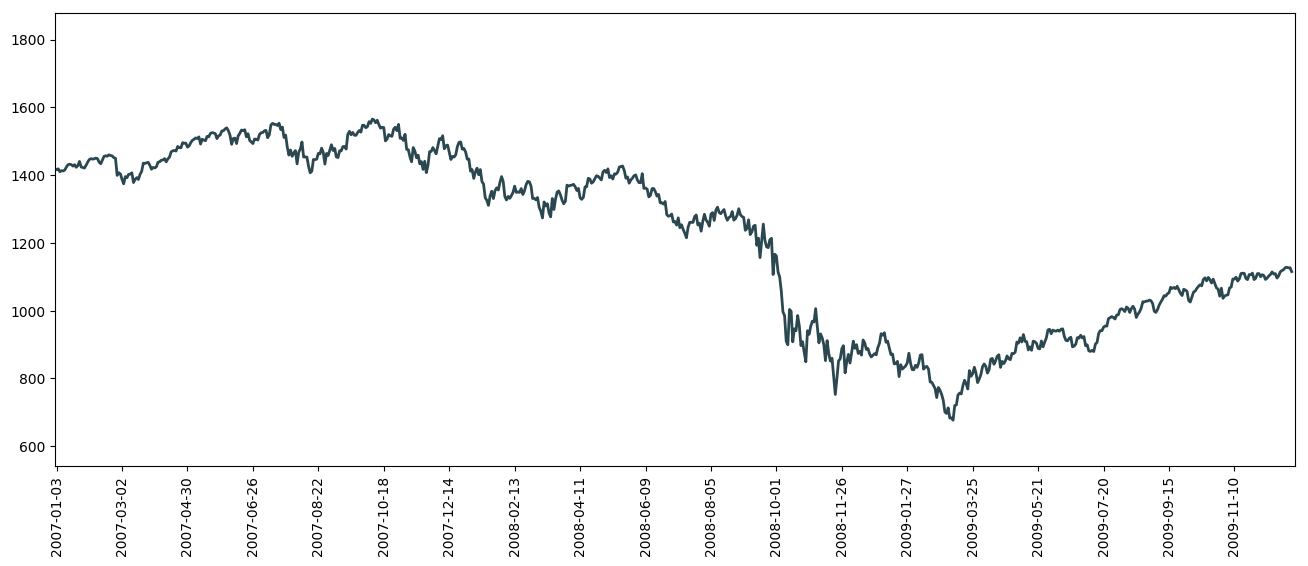

In [56]:
fig = plt.figure( figsize=(16,6),dpi=100)
ax = fig.add_subplot(1,1,1)
x = spx.index
y = spx.values
ax.plot( y, color=dt_hex, linewidth=2, linestyle='-')

ax.set_xlim(-1, len(x)+1)
ax.set_ylim(y.min()*0.8, y.max()*1.2)

ax.set_xticks(range(0, len(x), 40))
ax.set_xticklabels([x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()], rotation=90)

[Text(0, 0, '2007-01-03'),
 Text(0, 0, '2007-03-02'),
 Text(0, 0, '2007-04-30'),
 Text(0, 0, '2007-06-26'),
 Text(0, 0, '2007-08-22'),
 Text(0, 0, '2007-10-18'),
 Text(0, 0, '2007-12-14'),
 Text(0, 0, '2008-02-13'),
 Text(0, 0, '2008-04-11'),
 Text(0, 0, '2008-06-09'),
 Text(0, 0, '2008-08-05'),
 Text(0, 0, '2008-10-01'),
 Text(0, 0, '2008-11-26'),
 Text(0, 0, '2009-01-27'),
 Text(0, 0, '2009-03-25'),
 Text(0, 0, '2009-05-21'),
 Text(0, 0, '2009-07-20'),
 Text(0, 0, '2009-09-15'),
 Text(0, 0, '2009-11-10')]

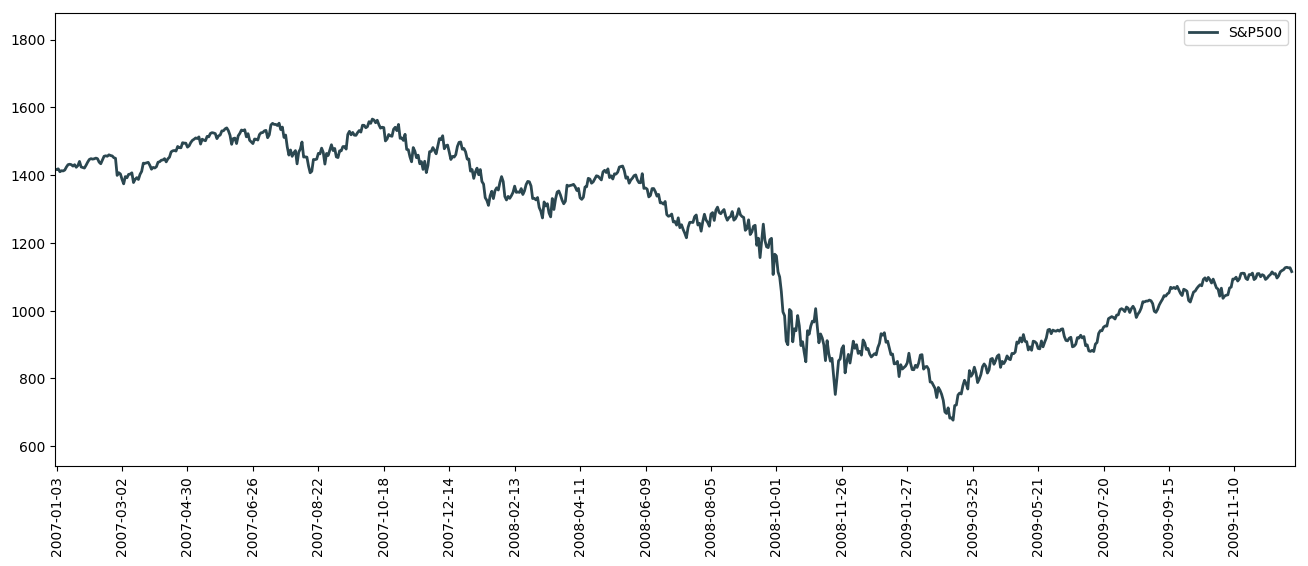

In [58]:
fig = plt.figure( figsize=(16,6),dpi=100)
ax = fig.add_subplot(1,1,1)
x = spx.index
y = spx.values
ax.plot( y, color=dt_hex, linewidth=2, linestyle='-', label='S&P500')
ax.legend(loc=0, frameon=True)

ax.set_xlim(-1, len(x)+1)
ax.set_ylim(y.min()*0.8, y.max()*1.2)

ax.set_xticks(range(0, len(x), 40))
ax.set_xticklabels([x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()], rotation=90)

In [59]:
data = pd.read_csv( '../data/data for matplotlib/VIX.csv', index_col=0, 
                               parse_dates=True,
                               dayfirst=True )
vix = data[['Adj Close']] \
     .loc['2007-01-01':'2010-01-01']
vix.head(3).append(vix.tail(3))

,Adj Close
Date,
2007-01-03,12.040000
2007-01-04,11.510000
2007-01-05,12.140000
2009-12-29,20.010000
2009-12-30,19.959999
2009-12-31,21.680000


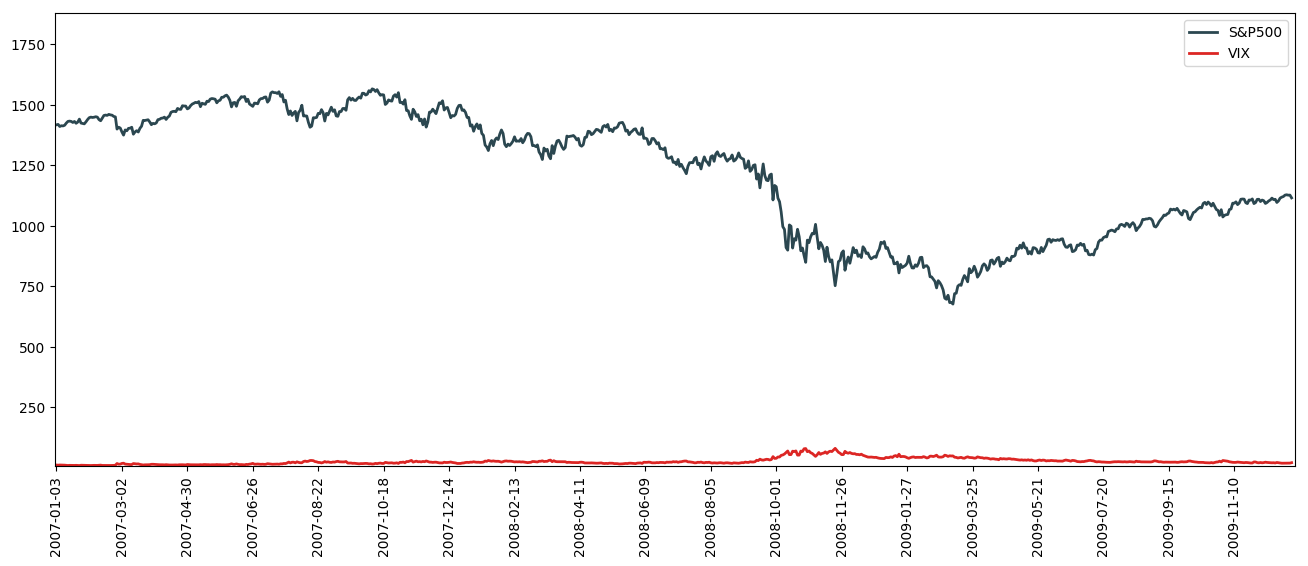

In [60]:
plt.figure( figsize=(16,6),dpi=100)
x = spx.index
y1 = spx.values
y2 = vix.values
plt.plot(y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500')
plt.plot(y2, color=r_hex, linewidth=2, linestyle='-', label='VIX')
plt.legend(loc=0, frameon=True)

plt.xlim(-1, len(x)+1)
plt.ylim(np.vstack([y1, y2]).min()*0.8, np.vstack([y1, y2]).max()*1.2)
         
x_tick = range(0,len(x),40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
plt.xticks(x_tick, x_label, rotation=90)
plt.show()

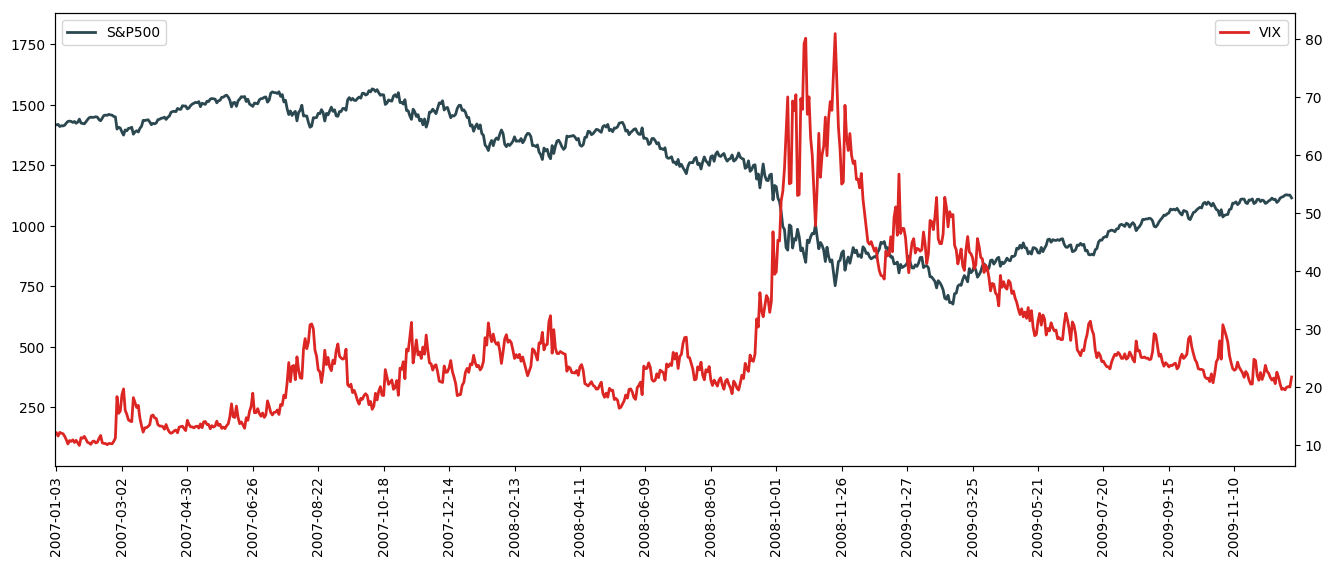

In [61]:
fig = plt.figure( figsize=(16,6),dpi=100)
ax1 = fig.add_subplot(1,1,1)

x = spx.index
y1 = spx.values
y2 = vix.values

ax1.plot(y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500')
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim(np.vstack([y1, y2]).min()*0.8, np.vstack([y1, y2]).max()*1.2)

x_tick = range(0,len(x),40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label, rotation=90)
ax1.legend(loc='upper left', frameon=True)

# Add a second axes
ax2 = ax1.twinx()
ax2.plot(y2, color=r_hex, linewidth=2, linestyle='-', label='VIX')
ax2.legend(loc='upper right', frameon=True)

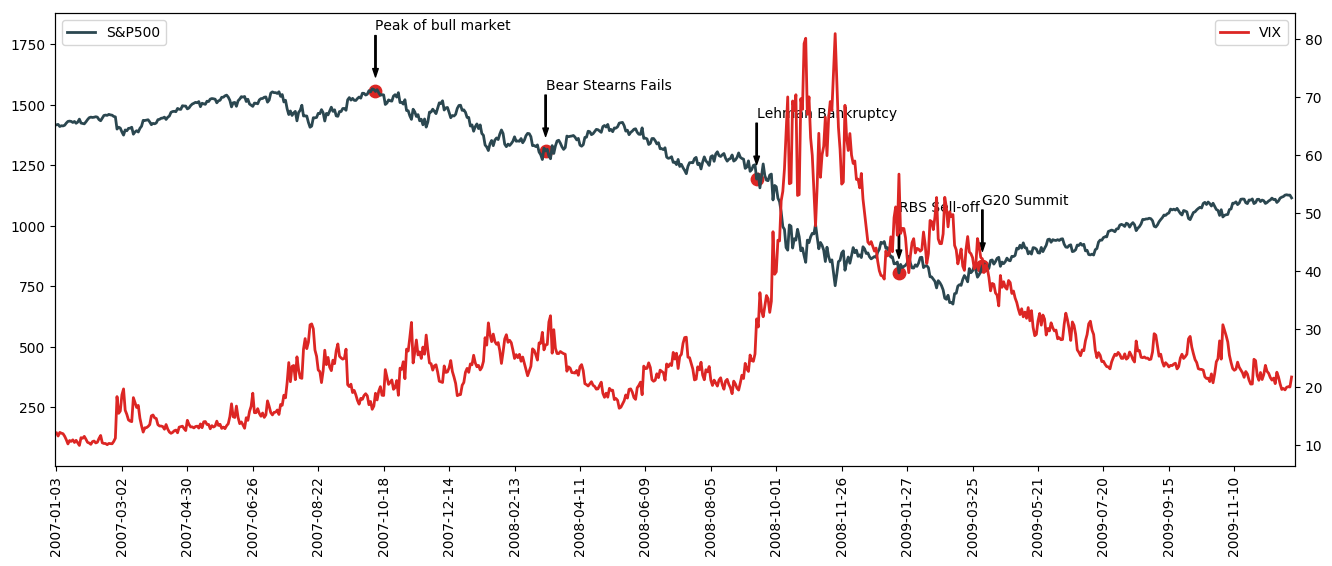

In [66]:
from datetime import datetime

fig = plt. figure( figsize=(16,6),dpi=100)
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
               (datetime(2009, 1, 20), 'RBS Sell-off'),
               (datetime(2009, 4, 2), 'G20 Summit')]

ax1 = fig.add_subplot(1,1,1)

x = spx.index
y1 = spx.values
y2 = vix.values

ax1.plot( y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500')
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim(np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2)


x_tick = range(0, len(x), 40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label, rotation=90)

ax1.legend(loc='upper left', frameon=True)

for date, label in crisis_data:
    date = date.strftime('%Y-%m-%d')
    xi = x.get_loc(date)
    yi = spx.asof(date)
    ax1.scatter(xi, yi, 80, color=r_hex)
    ax1.annotate(label, xy=(xi, yi + 60), 
                 xytext=(xi, yi + 300),
                 arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=6),
                 horizontalalignment='left', verticalalignment='top')

# Add a second axes
ax2 = ax1.twinx()
ax2.plot(y2, color=r_hex, linewidth=2, linestyle='-', label='VIX')
ax2.legend(loc='upper right', frameon=True)

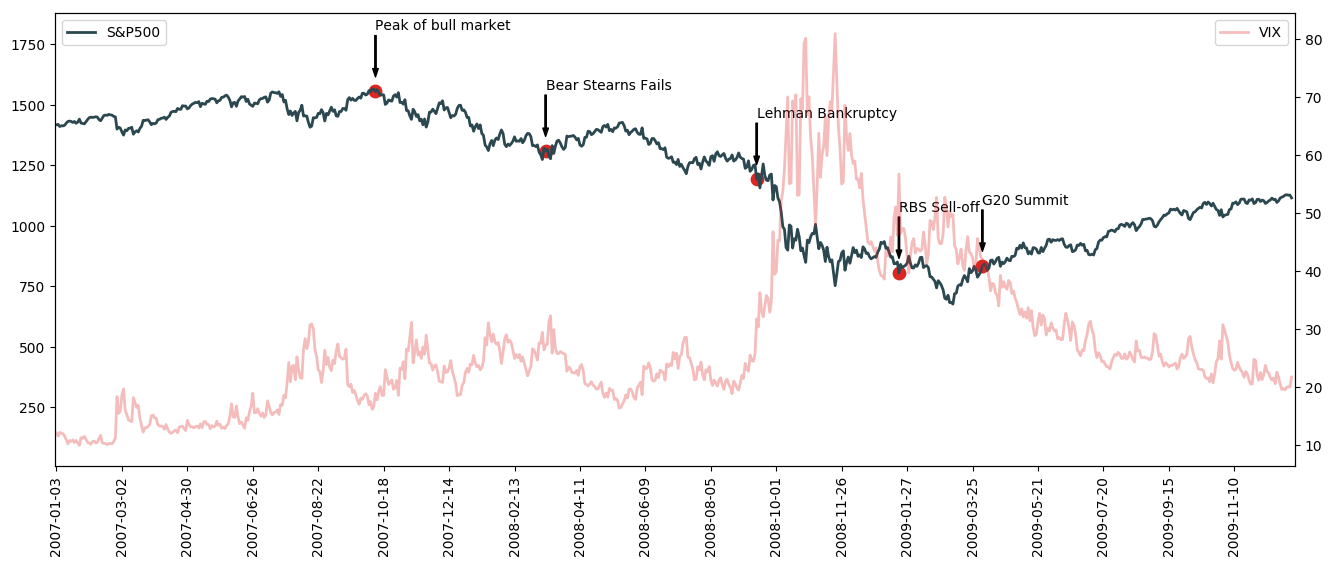

In [68]:
from datetime import datetime

fig = plt. figure( figsize=(16,6),dpi=100)
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
               (datetime(2009, 1, 20), 'RBS Sell-off'),
               (datetime(2009, 4, 2), 'G20 Summit')]

ax1 = fig.add_subplot(1,1,1)

x = spx.index
y1 = spx.values
y2 = vix.values

ax1.plot( y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500')
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim(np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2)


x_tick = range(0, len(x), 40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label, rotation=90)

ax1.legend(loc='upper left', frameon=True)

for date, label in crisis_data:
    date = date.strftime('%Y-%m-%d')
    xi = x.get_loc(date)
    yi = spx.asof(date)
    ax1.scatter(xi, yi, 80, color=r_hex)
    ax1.annotate(label, xy=(xi, yi + 60), 
                 xytext=(xi, yi + 300),
                 arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=6),
                 horizontalalignment='left', verticalalignment='top')

# Add a second axes
ax2 = ax1.twinx()
ax2.plot( y2, color=r_hex, 
              linewidth=2, 
              linestyle='-', 
              label='VIX', 
              alpha=0.3 )
ax2.legend(loc='upper right', frameon=True)

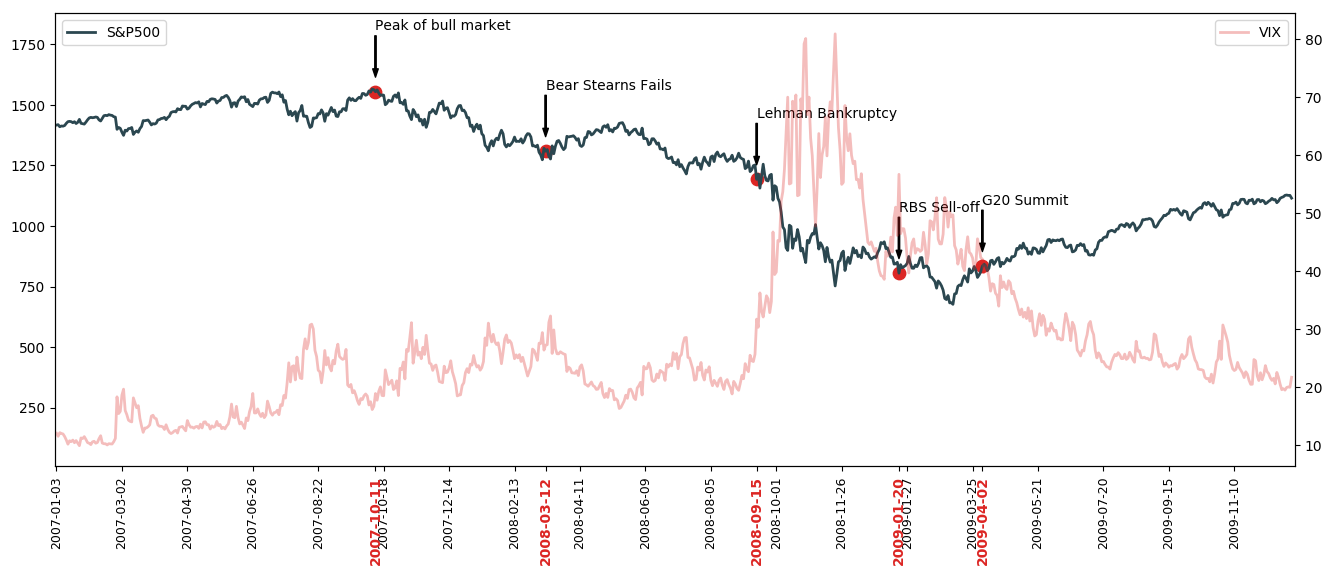

In [69]:
from datetime import datetime

fig = plt. figure( figsize=(16,6),dpi=100)
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
               (datetime(2009, 1, 20), 'RBS Sell-off'),
               (datetime(2009, 4, 2), 'G20 Summit')]

ax1 = fig.add_subplot(1,1,1)

x = spx.index
y1 = spx.values
y2 = vix.values

ax1.plot( y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500')
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim(np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2)

init_tick = list(range(0, len(x),40))
impt_tick = []
impt_date = []



ax1.legend(loc='upper left', frameon=True)

for date, label in crisis_data:
    date = date.strftime('%Y-%m-%d')
    impt_date.append(date)
    
    xi = x.get_loc(date)
    impt_tick.append(xi)
    yi = spx.asof(date)
    
    ax1.scatter(xi, yi, 80, color=r_hex)
    ax1.annotate(label, xy=(xi, yi + 60), 
                 xytext=(xi, yi + 300),
                 arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=6),
                 horizontalalignment='left', verticalalignment='top')

x_tick = init_tick + impt_tick
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label, rotation=90)   

for i, label in enumerate(ax1.get_xticklabels()):
    if i >= len(init_tick):
        label.set_color(r_hex)
        label.set_fontweight('bold')
    else:
        label.set_fontsize(9)
    
# Add a second axes
ax2 = ax1.twinx()
ax2.plot( y2, color=r_hex, 
              linewidth=2, 
              linestyle='-', 
              label='VIX', 
              alpha=0.3 )
ax2.legend(loc='upper right', frameon=True)